In [2]:
%load_ext lab_black
### Reloads modules properly
%load_ext autoreload
%autoreload 2

In [3]:
import os

os.sys.path.append("../")

In [4]:
import numpy as np

In [180]:
import pandas as pd

In [181]:
import matplotlib.pyplot as plt

In [182]:
from scipy.interpolate import interp1d

In [183]:
import seaborn as sns
import mplhep as hep

hep.style.use("CMS")

# Track ML data analysis

The point of this notebook is to understand how the trackML data can be used for primary vertexing

In [184]:
!ls -lhtr /media/lucas/QS/trackML/train_100_events/event000001000*

-rw-rw-r-- 1 lucas lucas  14M May  2 20:19 /media/lucas/QS/trackML/train_100_events/event000001000-cells.csv
-rw-rw-r-- 1 lucas lucas 4.4M May  2 20:19 /media/lucas/QS/trackML/train_100_events/event000001000-hits.csv
-rw-rw-r-- 1 lucas lucas 969K May  2 20:19 /media/lucas/QS/trackML/train_100_events/event000001000-particles.csv
-rw-rw-r-- 1 lucas lucas 9.9M May  2 20:19 /media/lucas/QS/trackML/train_100_events/event000001000-truth.csv


In [185]:
storage = "/media/lucas/QS/trackML/train_100_events/"

In [216]:
cells = pd.read_csv(storage + "event000001001-cells.csv")
hits = pd.read_csv(storage + "event000001001-hits.csv")
particles = pd.read_csv(storage + "event000001001-particles.csv")
truth = pd.read_csv(storage + "event000001001-truth.csv")

In [217]:
truth

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,324262265547128832,-69.2909,-0.794919,-1502.5,-0.511341,0.019336,-11.069000,0.000009
1,2,45044036452483072,-73.3068,-8.292610,-1502.5,-0.304958,-0.054226,-6.365820,0.000009
2,3,99080634911162368,-63.8197,-5.603060,-1502.5,-0.195871,-0.036081,-4.654030,0.000011
3,4,360288863542837248,-72.1087,-9.734450,-1502.5,-0.471937,-0.090321,-9.950480,0.000009
4,5,175642928088088576,-93.5056,-0.688461,-1502.5,-0.684687,0.025229,-10.986000,0.000011
...,...,...,...,...,...,...,...,...,...
93675,93676,603500629448458240,-776.9990,23.137600,2944.5,-2.469190,-0.028427,9.458110,0.000041
93676,93677,13516296440250368,-823.1700,10.316400,2944.5,-0.497569,0.107557,1.790790,0.000011
93677,93678,0,-874.7930,72.190100,2944.5,73670.700000,46771.700000,996185.000000,0.000000
93678,93679,621502521029955585,-858.2960,31.332200,2944.5,-0.082102,0.050101,0.129692,0.000000


In [218]:
truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,324262265547128832,-69.2909,-0.794919,-1502.5,-0.511341,0.019336,-11.06900,0.000009
1,2,45044036452483072,-73.3068,-8.292610,-1502.5,-0.304958,-0.054226,-6.36582,0.000009
2,3,99080634911162368,-63.8197,-5.603060,-1502.5,-0.195871,-0.036081,-4.65403,0.000011
3,4,360288863542837248,-72.1087,-9.734450,-1502.5,-0.471937,-0.090321,-9.95048,0.000009
4,5,175642928088088576,-93.5056,-0.688461,-1502.5,-0.684687,0.025229,-10.98600,0.000011


In [219]:
truth.shape

(93680, 9)

In [220]:
hits["r"] = np.sqrt(hits["x"] ** 2 + hits["y"] ** 2) / 10

In [221]:
hits["z"] = hits["z"] / 10
hits["x"] = hits["x"] / 10
hits["y"] = hits["y"] / 10

In [222]:
particles["pt"] = np.sqrt(particles["px"] ** 2 + +particles["py"] ** 2)

In [223]:
particles["pt"]

0       77.113204
1       11.078941
2       13.388072
3        0.571587
4        1.504362
          ...    
8910     0.459274
8911     0.808621
8912     0.971279
8913     1.315894
8914     0.728903
Name: pt, Length: 8915, dtype: float64

In [224]:
particles[particles.nhits > 7]

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pt
0,4503668346847232,-0.003686,0.013468,-6.50320,67.819000,-36.701900,-25.516200,-1,11,77.113204
1,4503805785800704,-0.003686,0.013468,-6.50320,-3.009700,10.662300,37.389700,1,11,11.078941
2,4504149383184384,-0.003686,0.013468,-6.50320,-4.913840,-12.453700,-58.793300,1,11,13.388072
3,4504286822137856,-0.003686,0.013468,-6.50320,0.258638,-0.509724,-9.905410,1,13,0.571587
4,4504355541614592,-0.003686,0.013468,-6.50320,-1.474890,-0.296320,-40.334400,-1,12,1.504362
...,...,...,...,...,...,...,...,...,...,...
8908,909733790518083584,-40.138500,-24.822700,-754.13000,-0.122801,0.114361,-2.198710,1,8,0.167805
8911,909733927957037056,-5.170030,-9.208700,-13.81590,-0.371499,-0.718232,-1.123440,1,13,0.808621
8912,909733996676513792,-5.170030,-9.208700,-13.81590,-0.499630,-0.832918,-2.256310,-1,11,0.971279
8913,909734615151804416,0.013658,-0.066359,6.24614,0.593284,-1.174560,0.214261,-1,12,1.315894


In [225]:
hits

,hit_id,x,y,z,volume_id,layer_id,module_id,r
0,1,-6.92717,-0.081250,-150.25,7,2,1,6.927646
1,2,-7.33090,-0.830235,-150.25,7,2,1,7.377763
2,3,-6.38168,-0.559927,-150.25,7,2,1,6.406197
3,4,-7.21258,-0.971387,-150.25,7,2,1,7.277699
4,5,-9.34875,-0.068585,-150.25,7,2,1,9.349002
...,...,...,...,...,...,...,...,...
93675,93676,-77.61550,2.303230,294.45,18,12,97,77.649667
93676,93677,-81.86940,1.006670,294.45,18,12,97,81.875589
93677,93678,-87.71470,7.234300,294.45,18,12,97,88.012520
93678,93679,-85.89890,3.134770,294.45,18,12,97,85.956081


In [226]:
hits[hits.hit_id == 2]

,hit_id,x,y,z,volume_id,layer_id,module_id,r
1,2,-7.3309,-0.830235,-150.25,7,2,1,7.377763


In [227]:
truth[truth.hit_id == 2]

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
1,2,45044036452483072,-73.3068,-8.29261,-1502.5,-0.304958,-0.054226,-6.36582,0.000009


In [228]:
particles

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pt
0,4503668346847232,-0.003686,0.013468,-6.50320,67.819000,-36.701900,-25.516200,-1,11,77.113204
1,4503805785800704,-0.003686,0.013468,-6.50320,-3.009700,10.662300,37.389700,1,11,11.078941
2,4504149383184384,-0.003686,0.013468,-6.50320,-4.913840,-12.453700,-58.793300,1,11,13.388072
3,4504286822137856,-0.003686,0.013468,-6.50320,0.258638,-0.509724,-9.905410,1,13,0.571587
4,4504355541614592,-0.003686,0.013468,-6.50320,-1.474890,-0.296320,-40.334400,-1,12,1.504362
...,...,...,...,...,...,...,...,...,...,...
8910,909733859254341633,-57.417300,-50.766300,-1102.50000,0.094553,-0.449436,0.154652,1,7,0.459274
8911,909733927957037056,-5.170030,-9.208700,-13.81590,-0.371499,-0.718232,-1.123440,1,13,0.808621
8912,909733996676513792,-5.170030,-9.208700,-13.81590,-0.499630,-0.832918,-2.256310,-1,11,0.971279
8913,909734615151804416,0.013658,-0.066359,6.24614,0.593284,-1.174560,0.214261,-1,12,1.315894


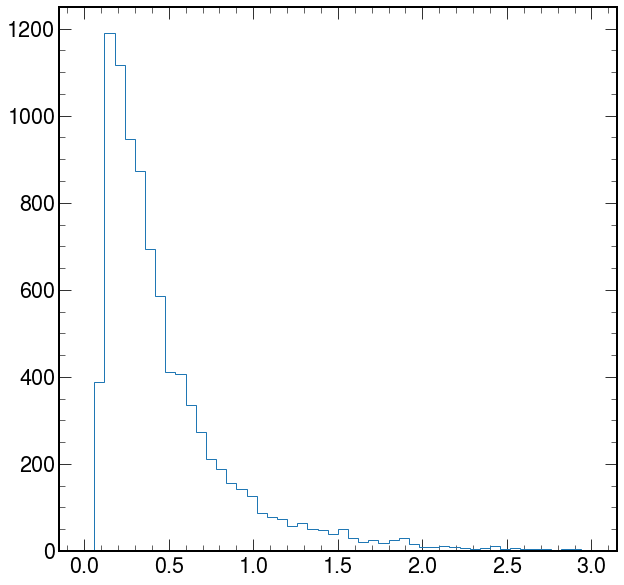

In [229]:
_ = plt.hist(particles["pt"].values, bins=50, histtype="step", range=(0, 3))

In [230]:
hits

,hit_id,x,y,z,volume_id,layer_id,module_id,r
0,1,-6.92717,-0.081250,-150.25,7,2,1,6.927646
1,2,-7.33090,-0.830235,-150.25,7,2,1,7.377763
2,3,-6.38168,-0.559927,-150.25,7,2,1,6.406197
3,4,-7.21258,-0.971387,-150.25,7,2,1,7.277699
4,5,-9.34875,-0.068585,-150.25,7,2,1,9.349002
...,...,...,...,...,...,...,...,...
93675,93676,-77.61550,2.303230,294.45,18,12,97,77.649667
93676,93677,-81.86940,1.006670,294.45,18,12,97,81.875589
93677,93678,-87.71470,7.234300,294.45,18,12,97,88.012520
93678,93679,-85.89890,3.134770,294.45,18,12,97,85.956081


In [231]:
particles.pt

0       77.113204
1       11.078941
2       13.388072
3        0.571587
4        1.504362
          ...    
8910     0.459274
8911     0.808621
8912     0.971279
8913     1.315894
8914     0.728903
Name: pt, Length: 8915, dtype: float64

In [232]:
print("hello")

hello


In [233]:
particles

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pt
0,4503668346847232,-0.003686,0.013468,-6.50320,67.819000,-36.701900,-25.516200,-1,11,77.113204
1,4503805785800704,-0.003686,0.013468,-6.50320,-3.009700,10.662300,37.389700,1,11,11.078941
2,4504149383184384,-0.003686,0.013468,-6.50320,-4.913840,-12.453700,-58.793300,1,11,13.388072
3,4504286822137856,-0.003686,0.013468,-6.50320,0.258638,-0.509724,-9.905410,1,13,0.571587
4,4504355541614592,-0.003686,0.013468,-6.50320,-1.474890,-0.296320,-40.334400,-1,12,1.504362
...,...,...,...,...,...,...,...,...,...,...
8910,909733859254341633,-57.417300,-50.766300,-1102.50000,0.094553,-0.449436,0.154652,1,7,0.459274
8911,909733927957037056,-5.170030,-9.208700,-13.81590,-0.371499,-0.718232,-1.123440,1,13,0.808621
8912,909733996676513792,-5.170030,-9.208700,-13.81590,-0.499630,-0.832918,-2.256310,-1,11,0.971279
8913,909734615151804416,0.013658,-0.066359,6.24614,0.593284,-1.174560,0.214261,-1,12,1.315894


In [234]:
truth

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,324262265547128832,-69.2909,-0.794919,-1502.5,-0.511341,0.019336,-11.069000,0.000009
1,2,45044036452483072,-73.3068,-8.292610,-1502.5,-0.304958,-0.054226,-6.365820,0.000009
2,3,99080634911162368,-63.8197,-5.603060,-1502.5,-0.195871,-0.036081,-4.654030,0.000011
3,4,360288863542837248,-72.1087,-9.734450,-1502.5,-0.471937,-0.090321,-9.950480,0.000009
4,5,175642928088088576,-93.5056,-0.688461,-1502.5,-0.684687,0.025229,-10.986000,0.000011
...,...,...,...,...,...,...,...,...,...
93675,93676,603500629448458240,-776.9990,23.137600,2944.5,-2.469190,-0.028427,9.458110,0.000041
93676,93677,13516296440250368,-823.1700,10.316400,2944.5,-0.497569,0.107557,1.790790,0.000011
93677,93678,0,-874.7930,72.190100,2944.5,73670.700000,46771.700000,996185.000000,0.000000
93678,93679,621502521029955585,-858.2960,31.332200,2944.5,-0.082102,0.050101,0.129692,0.000000


# Applying Cuts

- pT > 2 GeV 
- remove particles with single hits

In [235]:
mask_pt = particles.pt > 2

In [236]:
mask_pt.value_counts()

False    8752
True      163
Name: pt, dtype: int64

In [237]:
mask_nhits = particles.nhits > 4

In [238]:
mask_nhits.value_counts()

True     6569
False    2346
Name: nhits, dtype: int64

In [239]:
(mask_pt & mask_nhits).value_counts()

False    8771
True      144
dtype: int64

In [240]:
particles

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pt
0,4503668346847232,-0.003686,0.013468,-6.50320,67.819000,-36.701900,-25.516200,-1,11,77.113204
1,4503805785800704,-0.003686,0.013468,-6.50320,-3.009700,10.662300,37.389700,1,11,11.078941
2,4504149383184384,-0.003686,0.013468,-6.50320,-4.913840,-12.453700,-58.793300,1,11,13.388072
3,4504286822137856,-0.003686,0.013468,-6.50320,0.258638,-0.509724,-9.905410,1,13,0.571587
4,4504355541614592,-0.003686,0.013468,-6.50320,-1.474890,-0.296320,-40.334400,-1,12,1.504362
...,...,...,...,...,...,...,...,...,...,...
8910,909733859254341633,-57.417300,-50.766300,-1102.50000,0.094553,-0.449436,0.154652,1,7,0.459274
8911,909733927957037056,-5.170030,-9.208700,-13.81590,-0.371499,-0.718232,-1.123440,1,13,0.808621
8912,909733996676513792,-5.170030,-9.208700,-13.81590,-0.499630,-0.832918,-2.256310,-1,11,0.971279
8913,909734615151804416,0.013658,-0.066359,6.24614,0.593284,-1.174560,0.214261,-1,12,1.315894


In [241]:
particles_reduced = particles[mask_pt & mask_nhits]

In [242]:
particles_reduced

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pt
0,4503668346847232,-0.003686,0.013468,-6.50320,67.819000,-36.701900,-25.516200,-1,11,77.113204
1,4503805785800704,-0.003686,0.013468,-6.50320,-3.009700,10.662300,37.389700,1,11,11.078941
2,4504149383184384,-0.003686,0.013468,-6.50320,-4.913840,-12.453700,-58.793300,1,11,13.388072
7,4504561700044800,-0.003686,0.013468,-6.50320,-0.382059,2.648310,1.342460,1,14,2.675727
10,4504767858475008,-0.003686,0.013468,-6.50320,-4.080890,-8.773400,32.308000,1,14,9.676064
...,...,...,...,...,...,...,...,...,...,...
8282,855690526270160896,0.006267,0.000012,-1.20952,-0.493183,-2.402150,-0.132262,-1,12,2.452255
8348,860187734986194944,0.009277,0.025375,10.88530,2.012990,-0.204527,1.513230,-1,13,2.023354
8531,882705664403570688,0.004716,-0.007145,1.24554,-1.112700,2.450940,67.046700,1,13,2.691692
8587,882712605070721024,0.004716,-0.007145,1.24554,-0.466709,-2.157540,42.190000,1,15,2.207441


In [243]:
particles_reduced.shape

(144, 10)

In [244]:
truth.shape

(93680, 9)

In [245]:
truth_reduced = truth.loc[truth["particle_id"].isin(particles_reduced["particle_id"])]

In [246]:
truth_reduced.shape

(1677, 9)

In [247]:
truth_reduced.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
208,209,716077082395803648,-29.7011,-53.1842,-1502.0,-1.17660,-2.15310,-60.2736,0.000043
213,214,189154139287060480,-30.8651,-49.7384,-1502.0,-1.05118,-1.72981,-52.0360,0.000034
226,227,387313416244559872,-72.1281,-119.7370,-1502.0,-1.03698,-1.80801,-22.3107,0.000025
244,245,387313416244559872,-71.9421,-119.4130,-1498.0,-1.03801,-1.80724,-22.3113,0.000022
250,251,716077082395803648,-29.6132,-53.0234,-1497.5,-1.17814,-2.15421,-60.2742,0.000038


In [248]:
truth_reduced.loc[truth_reduced.particle_id == 801644925560029184]

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight


In [249]:
hits_reduced = hits.loc[hits["hit_id"].isin(truth_reduced["hit_id"])]

In [250]:
hits_reduced.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,r
208,209,-2.96854,-5.31790,-150.20,7,2,17,6.090344
213,214,-3.08678,-4.97496,-150.20,7,2,17,5.854779
226,227,-7.21152,-11.97410,-150.20,7,2,18,13.978022
244,245,-7.19280,-11.94250,-149.80,7,2,19,13.941294
250,251,-2.96229,-5.30282,-149.75,7,2,20,6.074131


In [251]:
test_hits = truth_reduced.loc[
    truth_reduced.particle_id == 801644925560029184
].hit_id.values

In [252]:
test_hits

array([], dtype=int64)

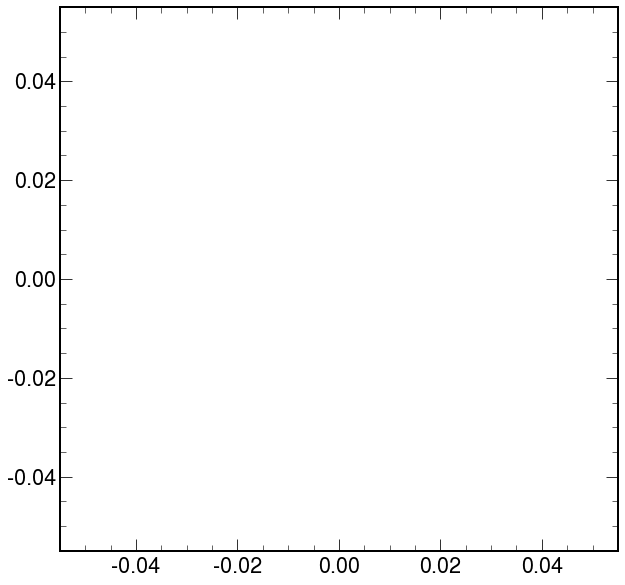

In [253]:
plt.plot(
    hits_reduced.loc[hits_reduced["hit_id"].isin(test_hits), "z"],
    hits_reduced.loc[hits_reduced["hit_id"].isin(test_hits), "r"],
    "o",
)

In [254]:
hits_reduced

,hit_id,x,y,z,volume_id,layer_id,module_id,r
208,209,-2.96854,-5.31790,-150.20,7,2,17,6.090344
213,214,-3.08678,-4.97496,-150.20,7,2,17,5.854779
226,227,-7.21152,-11.97410,-150.20,7,2,18,13.978022
244,245,-7.19280,-11.94250,-149.80,7,2,19,13.941294
250,251,-2.96229,-5.30282,-149.75,7,2,20,6.074131
...,...,...,...,...,...,...,...,...
93610,93611,-22.35710,85.07270,295.25,18,12,78,87.961379
93617,93618,-22.31790,75.47140,294.75,18,12,79,78.702102
93618,93619,-22.12880,84.32190,294.75,18,12,79,87.177214
93626,93627,-33.47910,73.49160,294.45,18,12,81,80.758067


In [255]:
truth_reduced

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
208,209,716077082395803648,-29.7011,-53.1842,-1502.0,-1.17660,-2.153100,-60.27360,0.000043
213,214,189154139287060480,-30.8651,-49.7384,-1502.0,-1.05118,-1.729810,-52.03600,0.000034
226,227,387313416244559872,-72.1281,-119.7370,-1502.0,-1.03698,-1.808010,-22.31070,0.000025
244,245,387313416244559872,-71.9421,-119.4130,-1498.0,-1.03801,-1.807240,-22.31130,0.000022
250,251,716077082395803648,-29.6132,-53.0234,-1497.5,-1.17814,-2.154210,-60.27420,0.000038
...,...,...,...,...,...,...,...,...,...
93610,93611,4503805785800704,-223.0790,848.7610,2952.5,-2.76502,10.758300,37.36880,0.000057
93617,93618,4532255649169408,-223.7480,756.5400,2947.5,-2.87242,9.517370,37.34860,0.000049
93618,93619,4503805785800704,-222.7090,847.3220,2947.5,-2.76839,10.758500,37.36990,0.000050
93626,93627,9008642363752448,-335.7500,736.9810,2944.5,-1.47396,3.396240,13.36040,0.000045


In [256]:
test_hits = pd.merge(
    hits_reduced, truth_reduced[["hit_id", "particle_id"]], how="left", on=["hit_id"]
)

In [257]:
test_hits

,hit_id,x,y,z,volume_id,layer_id,module_id,r,particle_id
0,209,-2.96854,-5.31790,-150.20,7,2,17,6.090344,716077082395803648
1,214,-3.08678,-4.97496,-150.20,7,2,17,5.854779,189154139287060480
2,227,-7.21152,-11.97410,-150.20,7,2,18,13.978022,387313416244559872
3,245,-7.19280,-11.94250,-149.80,7,2,19,13.941294,387313416244559872
4,251,-2.96229,-5.30282,-149.75,7,2,20,6.074131,716077082395803648
...,...,...,...,...,...,...,...,...,...
1672,93611,-22.35710,85.07270,295.25,18,12,78,87.961379,4503805785800704
1673,93618,-22.31790,75.47140,294.75,18,12,79,78.702102,4532255649169408
1674,93619,-22.12880,84.32190,294.75,18,12,79,87.177214,4503805785800704
1675,93627,-33.47910,73.49160,294.45,18,12,81,80.758067,9008642363752448


In [258]:
hits_reduced

,hit_id,x,y,z,volume_id,layer_id,module_id,r
208,209,-2.96854,-5.31790,-150.20,7,2,17,6.090344
213,214,-3.08678,-4.97496,-150.20,7,2,17,5.854779
226,227,-7.21152,-11.97410,-150.20,7,2,18,13.978022
244,245,-7.19280,-11.94250,-149.80,7,2,19,13.941294
250,251,-2.96229,-5.30282,-149.75,7,2,20,6.074131
...,...,...,...,...,...,...,...,...
93610,93611,-22.35710,85.07270,295.25,18,12,78,87.961379
93617,93618,-22.31790,75.47140,294.75,18,12,79,78.702102
93618,93619,-22.12880,84.32190,294.75,18,12,79,87.177214
93626,93627,-33.47910,73.49160,294.45,18,12,81,80.758067


In [259]:
test_hits

,hit_id,x,y,z,volume_id,layer_id,module_id,r,particle_id
0,209,-2.96854,-5.31790,-150.20,7,2,17,6.090344,716077082395803648
1,214,-3.08678,-4.97496,-150.20,7,2,17,5.854779,189154139287060480
2,227,-7.21152,-11.97410,-150.20,7,2,18,13.978022,387313416244559872
3,245,-7.19280,-11.94250,-149.80,7,2,19,13.941294,387313416244559872
4,251,-2.96229,-5.30282,-149.75,7,2,20,6.074131,716077082395803648
...,...,...,...,...,...,...,...,...,...
1672,93611,-22.35710,85.07270,295.25,18,12,78,87.961379,4503805785800704
1673,93618,-22.31790,75.47140,294.75,18,12,79,78.702102,4532255649169408
1674,93619,-22.12880,84.32190,294.75,18,12,79,87.177214,4503805785800704
1675,93627,-33.47910,73.49160,294.45,18,12,81,80.758067,9008642363752448


In [260]:
test_hits.sort_values(by="particle_id", ascending=True)

,hit_id,x,y,z,volume_id,layer_id,module_id,r,particle_id
559,28479,10.16950,-5.496720,-4.4759,8,6,334,11.559959,4503668346847232
1585,88680,89.55440,-48.002300,-34.6800,17,4,1129,101.608126,4503668346847232
1204,62031,31.60640,-17.042300,-12.5200,13,4,528,35.908279,4503668346847232
1296,66814,44.37250,-23.895600,-17.3000,13,6,657,50.397604,4503668346847232
1364,71633,58.55580,-31.486100,-22.6400,13,8,859,66.484255,4503668346847232
...,...,...,...,...,...,...,...,...,...
811,41312,6.13609,0.039053,82.2500,9,6,55,6.136214,905245103017164800
885,46237,9.70929,0.075952,129.7500,9,12,52,9.709587,905245103017164800
809,41241,6.10042,0.038987,81.7500,9,6,52,6.100545,905245103017164800
837,43145,7.15203,0.051517,95.7500,9,8,52,7.152216,905245103017164800


Text(0.5, 0, 'z')

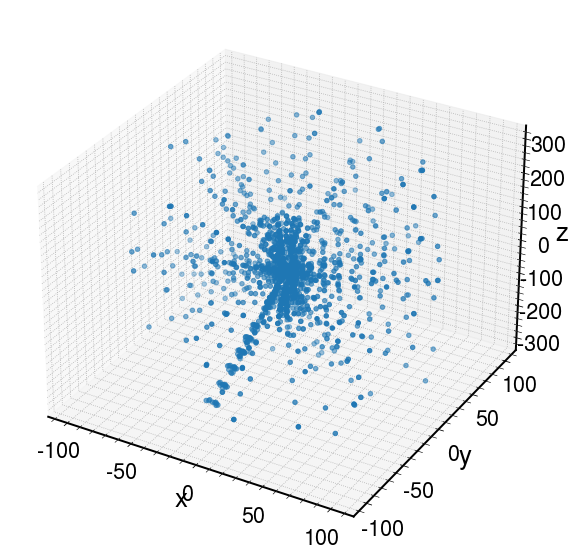

In [261]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
ax.scatter3D(test_hits.x, test_hits.y, test_hits.z, cmap="brg")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [100]:
# test_hits.to_pickle("test_hits.pickle")

In [101]:
import plotly.express as px

fig = px.scatter_3d(test_hits, x="x", y="y", z="z", color="particle_id")
fig.show()

In [102]:
test_hits

,hit_id,x,y,z,volume_id,layer_id,module_id,r,particle_id
0,27,-15.06990,-1.01456,-150.20,7,2,2,15.104013,801644925560029184
1,63,-7.28297,-2.74340,-150.20,7,2,6,7.782538,67555162641661952
2,172,-11.64980,-9.82661,-149.80,7,2,13,15.240738,355784439281745920
3,174,-8.15474,-6.90484,-149.80,7,2,13,10.685345,63053830757023744
4,303,-2.22738,-11.14090,-150.20,7,2,24,11.361376,180146458995982336
...,...,...,...,...,...,...,...,...,...
3132,120866,-58.45010,80.39870,295.55,18,12,84,99.400026,4516656327950336
3133,120885,-71.79650,62.62680,295.55,18,12,88,95.272522,878207631053815808
3134,120916,-84.30500,28.64940,294.45,18,12,93,89.039997,662030382174044160
3135,120923,-85.25670,28.98230,295.25,18,12,94,90.048202,662030382174044160


In [103]:
particles_reduced

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pt
16,4505317614288896,-0.009288,0.009861,-0.077879,0.861441,3.162570,-6.168040,1,11,3.277793
20,4505661211672576,-0.009288,0.009861,-0.077879,1.862730,1.109330,-4.106770,1,10,2.168035
21,4505729931149312,-0.009288,0.009861,-0.077879,2.679780,1.294030,-6.904520,1,11,2.975859
24,4505936089579520,-0.009288,0.009861,-0.077879,-2.060300,-1.021010,-0.177392,1,14,2.299412
37,4507173040160768,-0.009288,0.009861,-0.077879,-45.300700,-2.215280,459.528000,1,10,45.354833
...,...,...,...,...,...,...,...,...,...,...
12064,968278386650644480,-0.004178,0.004751,-5.128840,2.057180,-1.250930,-1.117000,1,9,2.407658
12067,968278730248028160,-0.004178,0.004751,-5.128840,3.303940,-0.835087,-0.215099,-1,12,3.407842
12091,968280585673900032,-0.004178,0.004751,-5.128840,-3.429960,-2.365510,10.758500,-1,13,4.166565
12151,968287182743666688,-0.004178,0.004751,-5.128840,-4.027260,-3.576170,14.973300,1,12,5.385890


In [262]:
def calc_z0(hits: pd.DataFrame) -> pd.DataFrame:
    list_of_particles = hits["particle_id"].unique()
    print(len(list_of_particles))
    z0s = []

    for particle in list_of_particles:
        r = hits.loc[hits["particle_id"] == particle, "r"].values
        z = hits.loc[hits["particle_id"] == particle, "z"].values

        trk = np.polyfit(z, r, 1)

        z0 = -trk[1] / trk[0]
        z0s.append(z0)

    results = pd.DataFrame({"particle_id": list_of_particles, "trk_z0": z0s})

    return results

In [263]:
trk_z0 = calc_z0(test_hits)

144


<AxesSubplot:>

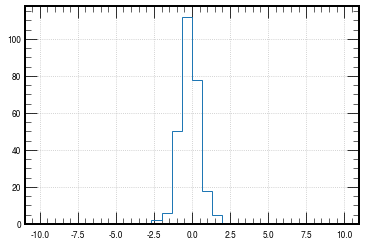

In [121]:
trk_z0["trk_z0"].hist(bins=30, histtype="step", range=(-10, 10))

In [122]:
trk_z0

,particle_id,trk_z0
0,801644925560029184,0.238633
1,67555162641661952,0.069318
2,355784439281745920,0.051456
3,63053830757023744,-0.071288
4,180146458995982336,1.147738
...,...,...
270,27032936477884416,-0.782525
271,94583563634081792,-2.482851
272,220711222515859456,-1.858509
273,837698530310094848,-1.844350


In [123]:
particles

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pt
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8,0.327963
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11,1.058622
2,4503805785800704,-0.009288,0.009861,-0.077879,-0.886484,0.105749,0.683881,-1,0,0.892769
3,4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12,0.724067
4,4503943224754176,-0.009288,0.009861,-0.077879,16.439400,-15.548900,-39.824900,1,3,22.627907
...,...,...,...,...,...,...,...,...,...,...
12258,968305530860736513,-171.641000,302.668000,-1220.000000,-0.110735,-0.058300,-0.137469,1,0,0.125144
12259,968305530860740610,-171.641000,302.668000,-1220.000000,0.000191,-0.169234,-0.248553,1,4,0.169234
12260,968306149319245824,33.448100,20.703400,-102.515000,0.486316,0.268579,-1.227300,1,10,0.555552
12261,968306218038722560,33.448100,20.703400,-102.515000,0.082110,0.084122,-0.415145,-1,1,0.117553


In [124]:
trk_z0 = pd.merge(
    trk_z0, particles[["particle_id", "pt"]], how="left", on="particle_id"
)

In [125]:
trk_z0

,particle_id,trk_z0,pt
0,801644925560029184,0.238633,2.596076
1,67555162641661952,0.069318,2.032785
2,355784439281745920,0.051456,3.361683
3,63053830757023744,-0.071288,6.712018
4,180146458995982336,1.147738,3.526503
...,...,...,...
270,27032936477884416,-0.782525,3.317788
271,94583563634081792,-2.482851,2.100487
272,220711222515859456,-1.858509,2.415892
273,837698530310094848,-1.844350,2.124336


In [114]:
trk_z0

,particle_id,trk_z0,pt
0,801644925560029184,0.238633,2.596076
1,67555162641661952,0.069318,2.032785
2,355784439281745920,0.051456,3.361683
3,63053830757023744,-0.071288,6.712018
4,180146458995982336,1.147738,3.526503
...,...,...,...
3132,4516656327950336,-0.257794,8.160194
3133,878207631053815808,0.201933,2.093799
3134,662030382174044160,-0.716430,2.232902
3135,662030382174044160,-0.716430,2.232902


In [126]:
def inv_ecdf(h, edges):
    x = 0.5 * (edges[1:] + edges[:-1])
    cf = np.zeros(len(x))
    count = 0

    for i, _ in enumerate(cf):
        count = count + h[i]
        cf[i] = count

    cp = 100 * cf / sum(h)

    d = interp1d(cp, x)

    return d

In [131]:
def plot_fast_histo(
    df: pd.DataFrame,
    xlim="auto",
):
    plt.figure(figsize=(16, 8))

    be = np.linspace(-15, 15, 256)

    h, be = np.histogram(df.trk_z0, bins=be, weights=df.pt)
    h = np.convolve(h, [1, 1, 1], mode="same")
    hep.histplot(h, be, label="reco")

    max_index = np.argmax(h)
    if xlim == "auto":
        d = inv_ecdf(h, be)
        xmin = d(5)
        xmax = d(95)

        xlim = [xmin, xmax]

    plt.legend(fontsize=14)
    plt.xlim(xlim)
    plt.xlabel("$z_{0}$", fontsize=14)
    plt.tick_params(axis="both", which="major", labelsize=14)

In [132]:
-15

-15

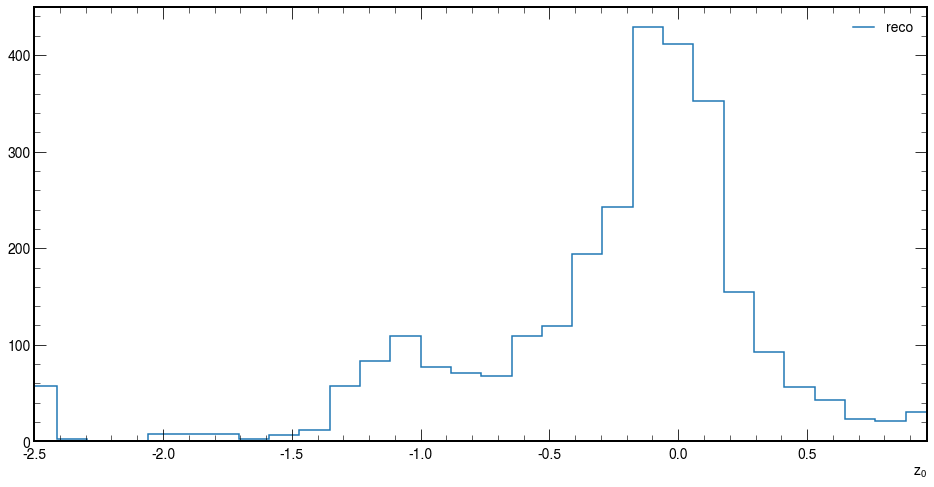

In [133]:
plot_fast_histo(trk_z0)

In [135]:
trk_z0

,particle_id,trk_z0,pt
0,801644925560029184,0.238633,2.596076
1,67555162641661952,0.069318,2.032785
2,355784439281745920,0.051456,3.361683
3,63053830757023744,-0.071288,6.712018
4,180146458995982336,1.147738,3.526503
...,...,...,...
270,27032936477884416,-0.782525,3.317788
271,94583563634081792,-2.482851,2.100487
272,220711222515859456,-1.858509,2.415892
273,837698530310094848,-1.844350,2.124336


In [136]:
test_hits

,hit_id,x,y,z,volume_id,layer_id,module_id,r,particle_id
0,27,-15.06990,-1.01456,-150.20,7,2,2,15.104013,801644925560029184
1,63,-7.28297,-2.74340,-150.20,7,2,6,7.782538,67555162641661952
2,172,-11.64980,-9.82661,-149.80,7,2,13,15.240738,355784439281745920
3,174,-8.15474,-6.90484,-149.80,7,2,13,10.685345,63053830757023744
4,303,-2.22738,-11.14090,-150.20,7,2,24,11.361376,180146458995982336
...,...,...,...,...,...,...,...,...,...
3132,120866,-58.45010,80.39870,295.55,18,12,84,99.400026,4516656327950336
3133,120885,-71.79650,62.62680,295.55,18,12,88,95.272522,878207631053815808
3134,120916,-84.30500,28.64940,294.45,18,12,93,89.039997,662030382174044160
3135,120923,-85.25670,28.98230,295.25,18,12,94,90.048202,662030382174044160


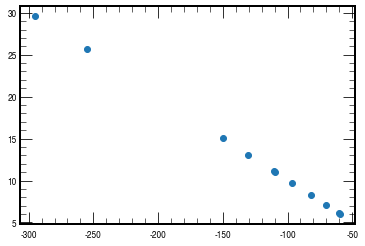

In [139]:
plt.plot(
    test_hits[test_hits.particle_id == 801644925560029184].z,
    test_hits[test_hits.particle_id == 801644925560029184].r,
    "o",
)

In [140]:
z_t0 = test_hits[test_hits.particle_id == 801644925560029184].z
r_t0 = test_hits[test_hits.particle_id == 801644925560029184].r

In [142]:
m0 = np.polyfit(z_t0, r_t0, 1)

In [149]:
z_m0 = np.linspace(-500, 500, 1000)

In [150]:
r_m0 = m0[0] * z_m0 + m0[1]

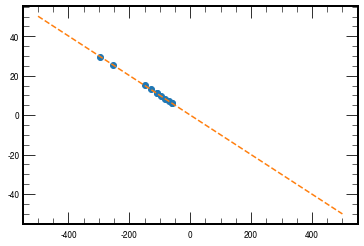

In [151]:
plt.plot(z_t0, r_t0, "o")
plt.plot(z_m0, r_m0, "--")

In [148]:
test_hits

,hit_id,x,y,z,volume_id,layer_id,module_id,r,particle_id
0,27,-15.06990,-1.01456,-150.20,7,2,2,15.104013,801644925560029184
1,63,-7.28297,-2.74340,-150.20,7,2,6,7.782538,67555162641661952
2,172,-11.64980,-9.82661,-149.80,7,2,13,15.240738,355784439281745920
3,174,-8.15474,-6.90484,-149.80,7,2,13,10.685345,63053830757023744
4,303,-2.22738,-11.14090,-150.20,7,2,24,11.361376,180146458995982336
...,...,...,...,...,...,...,...,...,...
3132,120866,-58.45010,80.39870,295.55,18,12,84,99.400026,4516656327950336
3133,120885,-71.79650,62.62680,295.55,18,12,88,95.272522,878207631053815808
3134,120916,-84.30500,28.64940,294.45,18,12,93,89.039997,662030382174044160
3135,120923,-85.25670,28.98230,295.25,18,12,94,90.048202,662030382174044160


In [153]:
trk_z0

,particle_id,trk_z0,pt
0,801644925560029184,0.238633,2.596076
1,67555162641661952,0.069318,2.032785
2,355784439281745920,0.051456,3.361683
3,63053830757023744,-0.071288,6.712018
4,180146458995982336,1.147738,3.526503
...,...,...,...
270,27032936477884416,-0.782525,3.317788
271,94583563634081792,-2.482851,2.100487
272,220711222515859456,-1.858509,2.415892
273,837698530310094848,-1.844350,2.124336


In [154]:
df2 = trk_z0[0:150].copy()

In [157]:
trk_z0.reset_index()

,index,particle_id,trk_z0,pt
0,0,801644925560029184,0.238633,2.596076
1,1,67555162641661952,0.069318,2.032785
2,2,355784439281745920,0.051456,3.361683
3,3,63053830757023744,-0.071288,6.712018
4,4,180146458995982336,1.147738,3.526503
...,...,...,...,...
270,270,27032936477884416,-0.782525,3.317788
271,271,94583563634081792,-2.482851,2.100487
272,272,220711222515859456,-1.858509,2.415892
273,273,837698530310094848,-1.844350,2.124336


In [158]:
trk_z0["event_number"] = 0
trk_z0.reset_index(inplace=True)
trk_z0.rename(columns={"index": "track_number"}, inplace=True)

In [159]:
trk_z0

,track_number,particle_id,trk_z0,pt,event_number
0,0,801644925560029184,0.238633,2.596076,0
1,1,67555162641661952,0.069318,2.032785,0
2,2,355784439281745920,0.051456,3.361683,0
3,3,63053830757023744,-0.071288,6.712018,0
4,4,180146458995982336,1.147738,3.526503,0
...,...,...,...,...,...
270,270,27032936477884416,-0.782525,3.317788,0
271,271,94583563634081792,-2.482851,2.100487,0
272,272,220711222515859456,-1.858509,2.415892,0
273,273,837698530310094848,-1.844350,2.124336,0


In [160]:
df2 = trk_z0[0:150].copy()

In [161]:
df2["event_number"] = 1

In [162]:
trk_z0.append(df2)

/tmp/ipykernel_281276/2051860313.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,track_number,particle_id,trk_z0,pt,event_number
0,0,801644925560029184,0.238633,2.596076,0
1,1,67555162641661952,0.069318,2.032785,0
2,2,355784439281745920,0.051456,3.361683,0
3,3,63053830757023744,-0.071288,6.712018,0
4,4,180146458995982336,1.147738,3.526503,0
...,...,...,...,...,...
145,145,117118398042734592,0.075243,4.656816,1
146,146,4549710396260352,14.346365,10.919498,1
147,147,662030450893520896,-1.014635,7.062415,1
148,148,364798304325730304,-1.243652,2.126347,1


In [163]:
test_empty = pd.DataFrame({})

In [164]:
pd.concat([test_empty, trk_z0])

,track_number,particle_id,trk_z0,pt,event_number
0,0,801644925560029184,0.238633,2.596076,0
1,1,67555162641661952,0.069318,2.032785,0
2,2,355784439281745920,0.051456,3.361683,0
3,3,63053830757023744,-0.071288,6.712018,0
4,4,180146458995982336,1.147738,3.526503,0
...,...,...,...,...,...
270,270,27032936477884416,-0.782525,3.317788,0
271,271,94583563634081792,-2.482851,2.100487,0
272,272,220711222515859456,-1.858509,2.415892,0
273,273,837698530310094848,-1.844350,2.124336,0


In [165]:
hits

,hit_id,x,y,z,volume_id,layer_id,module_id,r
0,1,-6.44099,-0.716370,-150.25,7,2,1,6.480705
1,2,-5.53361,0.063534,-150.25,7,2,1,5.533975
2,3,-8.38305,-0.114301,-150.25,7,2,1,8.383829
3,4,-9.61091,-0.824103,-150.25,7,2,1,9.646177
4,5,-6.26736,-0.937120,-150.25,7,2,1,6.337034
...,...,...,...,...,...,...,...,...
120934,120935,-76.38630,5.156940,294.45,18,12,97,76.560178
120935,120936,-80.87050,0.345926,294.45,18,12,97,80.871240
120936,120937,-98.29360,4.146090,295.25,18,12,98,98.381004
120937,120938,-94.26990,1.848910,295.25,18,12,98,94.288030
